In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as ms
import sklearn.svm as svm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
X = np.random.randn(50, 2)
y = X[:, 0] + X[:, 1] > 1
print(y)

[False False False False False  True  True False False False False  True
  True False False  True False False False  True False False  True False
 False False  True False False False False  True False False False False
 False False False False  True False False False False False False False
 False False]


In [3]:
est = svm.LinearSVC()
est.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [4]:
# We generate a grid in the square [-3,3 ]^2.
xx, yy = np.meshgrid(np.linspace(-3, 3, len(X)),
                     np.linspace(-3, 3, len(y)))

# This function takes a SVM estimator as input.


def plot_decision_function(est, title):
    # We evaluate the decision function on the grid.
    Z = est.decision_function(np.c_[xx.ravel(),
                                    yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap = 'viridis'

    # We display the decision function on the grid.
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.imshow(Z,
              extent=(xx.min(), xx.max(),
                      yy.min(), yy.max()),
              aspect='auto',
              origin='lower',
              cmap=cmap)

    # We display the boundaries.
#     ax.contour(xx, yy, Z, levels=[0],
#                linewidths=2,
#                colors='k')
        # plot decision boundary and margins
    ax.contour(xx, yy, Z, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['-.', '-', '-.'])

    # We display the points with their true labels.
    ax.scatter(X[:, 0], X[:, 1],
               s=50, c=.5 + .5 * y,
               edgecolors='k',
               lw=1, cmap=cmap,
               vmin=0, vmax=1)
    ax.axhline(0, color='k', ls=':')
    ax.axvline(0, color='k', ls=':')
    ax.axis([-3, 3, -3, 3])
    ax.set_axis_off()
    ax.set_title(title)

Score: 0.898


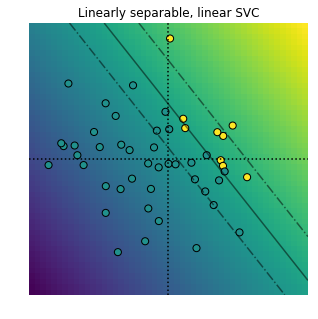

In [5]:
ax = plot_decision_function(
    est, "Linearly separable, linear SVC")
print('Score: {0:.3f}'.format(ms.cross_val_score(est, X,y).mean()))

[1.00000000e-03 4.64158883e-03 2.15443469e-02 1.00000000e-01
 4.64158883e-01 2.15443469e+00 1.00000000e+01 4.64158883e+01
 2.15443469e+02 1.00000000e+03]
{'C': 0.021544346900318832}
Score: 0.5


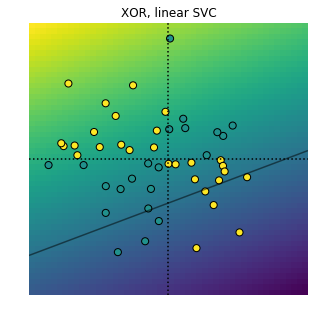

In [6]:
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# We train the classifier.
est = ms.GridSearchCV(svm.LinearSVC(),
                      {'C': np.logspace(-3., 3., 10)})
est.fit(X, y)
print(np.logspace(-3., 3., 10))
print(est.best_params_)
print("Score: {0:.1f}".format(
      ms.cross_val_score(est, X, y).mean()))

# We plot the decision function.
ax = plot_decision_function(
    est, "XOR, linear SVC")
Score: 0.5
plt.show()

{'C': 215.44346900318823, 'gamma': 0.46415888336127775}
Score: 0.896


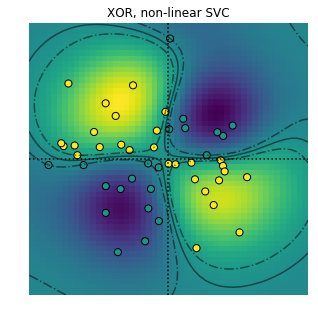

In [7]:
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

est = ms.GridSearchCV(
    svm.SVC(), {'C': np.logspace(-3., 3., 10),
                'gamma': np.logspace(-3., 3., 10)})
est.fit(X, y)
print(est.best_params_)
print("Score: {0:.3f}".format(
      ms.cross_val_score(est, X, y).mean()))

plot_decision_function(
    est.best_estimator_, "XOR, non-linear SVC")

Disini gamma membuat bell shape curve nya lebih tajam, dan C nya adalah soft margin cost function 

Score: 0.877
Score: 0.840
Score: 0.840
Score: 0.880
Score: 0.921
Score: 0.921
Score: 0.840
Score: 0.900
Score: 0.921


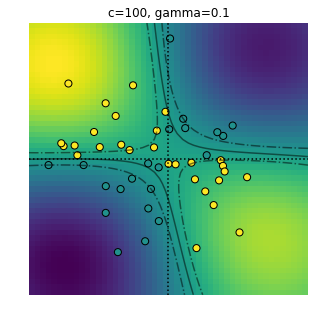

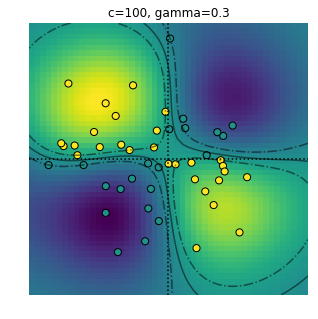

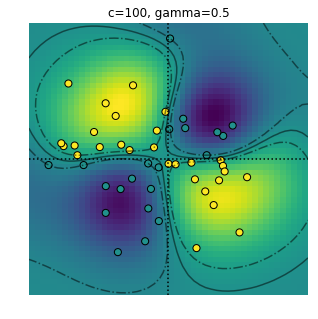

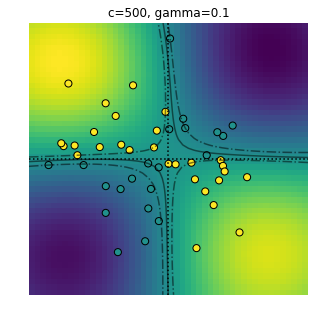

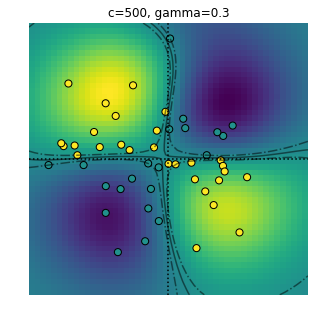

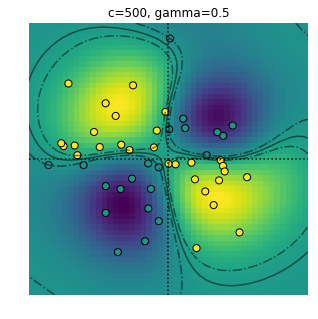

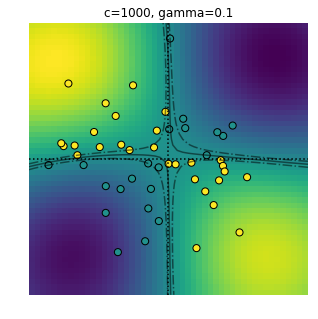

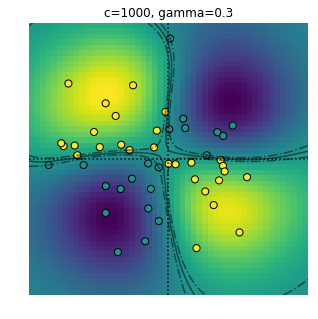

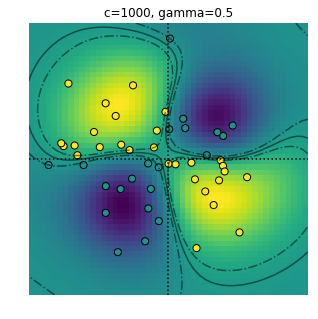

In [8]:
c_=[100,500,1000]
gamma_ = [0.1,0.3,0.5]
for c in c_: 
    for g_ in gamma_:
        est = svm.SVC(C=c, gamma=g_)
        est.fit(X,y)
        plot_decision_function(est, f"c={c}, gamma={g_}")
        print('Score: {0:.3f}'.format(ms.cross_val_score(est, X,y).mean()))
# est = svm.SVC(C=1000, gamma=0.1)
# est.fit(X,y)
# plot_decision_function(
#     est, "XOR, c=1000, gamma=0.1"
# )